<a href="https://colab.research.google.com/github/Hnova28/Game/blob/main/AI_job_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #work on array
import pandas as pd # work on datafram means create table
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/ai_job_market_insights.csv')
print(df.to_string())

                 Job_Title            Industry Company_Size       Location AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD Remote_Friendly Job_Growth_Projection
0    Cybersecurity Analyst       Entertainment        Small          Dubai            Medium            High        UX/UI Design  111392.165243             Yes                Growth
1     Marketing Specialist          Technology        Large      Singapore            Medium            High           Marketing   93792.562466              No               Decline
2            AI Researcher          Technology        Large      Singapore            Medium            High        UX/UI Design  107170.263069             Yes                Growth
3            Sales Manager              Retail        Small         Berlin               Low            High  Project Management   93027.953758              No                Growth
4    Cybersecurity Analyst       Entertainment        Small          Tokyo               L

In [ ]:
df.shape

(500, 10)

In [ ]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [ ]:
pd.isnull(df) #check for null value in data

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isnull(df).sum() #total the null value

,0
Job_Title,0
Industry,0
Company_Size,0
Location,0
AI_Adoption_Level,0
Automation_Risk,0
Required_Skills,0
Salary_USD,0
Remote_Friendly,0
Job_Growth_Projection,0


In [ ]:
df.astype({'Salary_USD':'int'}) # convert float to int
df.head(2)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792,No,Decline


In [ ]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

In [ ]:
df.rename(columns={'Salary_USD': 'Salary'}, inplace=True)
df.head(2)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792,No,Decline


In [ ]:
df['Salary'].describe()

,Salary
count,500.000000
mean,91221.850000
std,20504.288786
min,31969.000000
25%,78511.250000
50%,91998.000000
75%,103970.750000
max,155209.000000


## **EDA(exploratory data analysis)**

In [ ]:
companysize_count=df['Company_Size'].value_counts() #count
print(companysize_count)

Company_Size
Small     171
Large     166
Medium    163
Name: count, dtype: int64


In [ ]:
companysize_count=df['Company_Size'].value_counts(normalize='True')*100 #percentage
print(companysize_count)

Company_Size
Small     34.2
Large     33.2
Medium    32.6
Name: proportion, dtype: float64


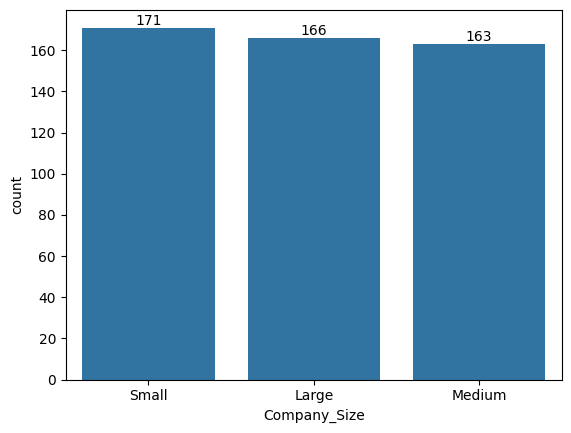

In [ ]:
ax=sns.countplot(x='Company_Size', data=df)
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Company_Size', ylabel='Salary'>

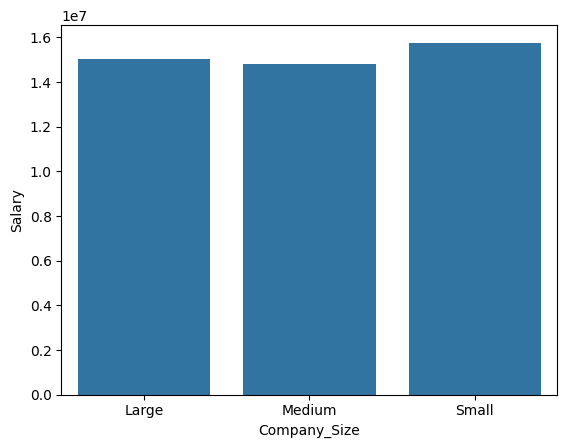

In [ ]:
result=df.groupby(['Company_Size'], as_index=False)['Salary'].sum() # as_index=False use for indexing like 0,1 cause campany_size not the int value
sns.barplot(x='Company_Size' , y='Salary', data=result)

**The bar graph shows that small companies have the highest total salary, followed by large and then medium-sized companies.**


In [ ]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

In [ ]:
Automation_count=df['Automation_Risk'].value_counts()
print(Automation_count)

Automation_Risk
Medium    173
High      169
Low       158
Name: count, dtype: int64


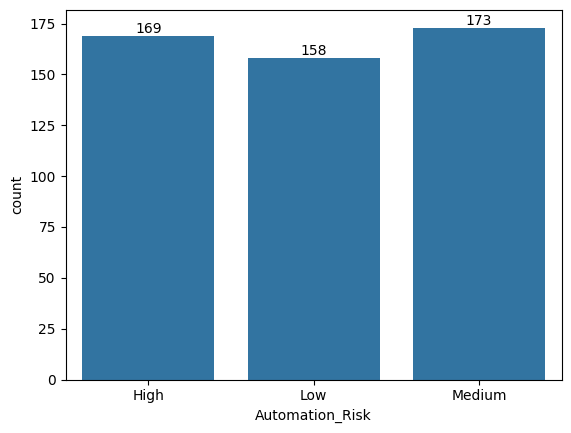

In [ ]:
ax=sns.countplot(x='Automation_Risk',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

# Automation risk means how likely a job or skill can be replaced by machines or AI in the future. the graph shows medium chance have high rate


In [ ]:
skill=df['Required_Skills'].value_counts()
print(skill)

Required_Skills
Python                60
Project Management    60
Cybersecurity         58
Machine Learning      52
Data Analysis         49
UX/UI Design          49
Sales                 49
Marketing             45
JavaScript            44
Communication         34
Name: count, dtype: int64


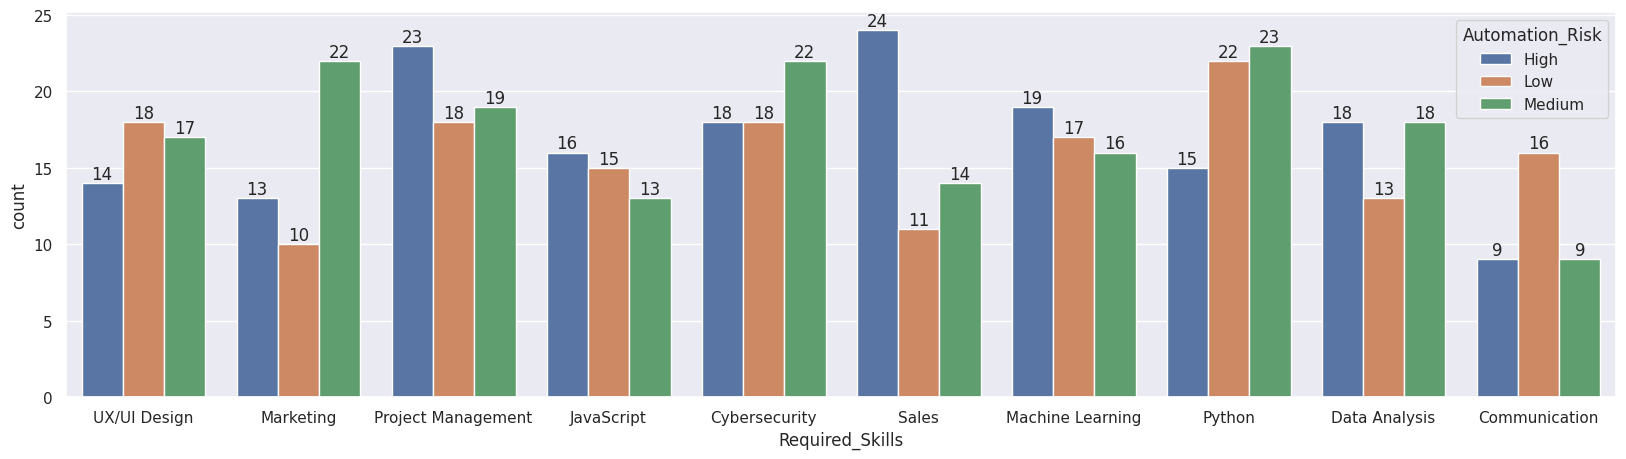

In [ ]:
ax=sns.countplot(x='Required_Skills', hue='Automation_Risk', data=df)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
  ax.bar_label(bars)

**The graph shows required skills categorized by automation risk, with ascending order Sales (High risk), Python (Medium risk and Low risk)**

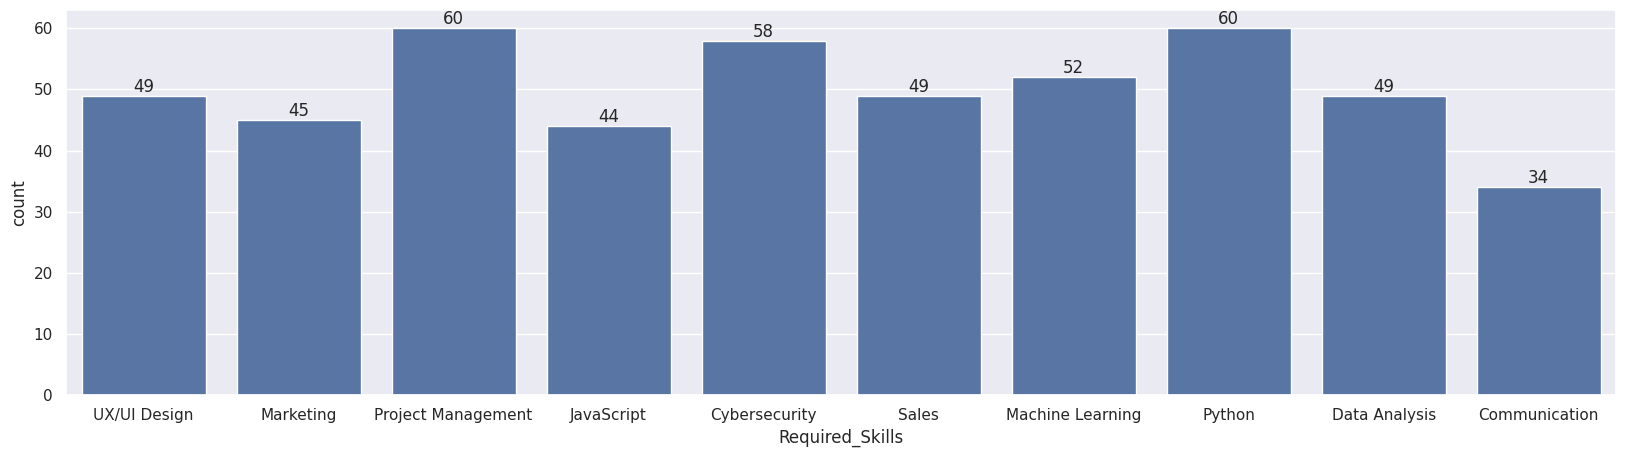

In [ ]:
ax=sns.countplot(x='Required_Skills',data=df)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
  ax.bar_label(bars)


**The graph shows that in job market most demandable required skills are project management & pyhton**

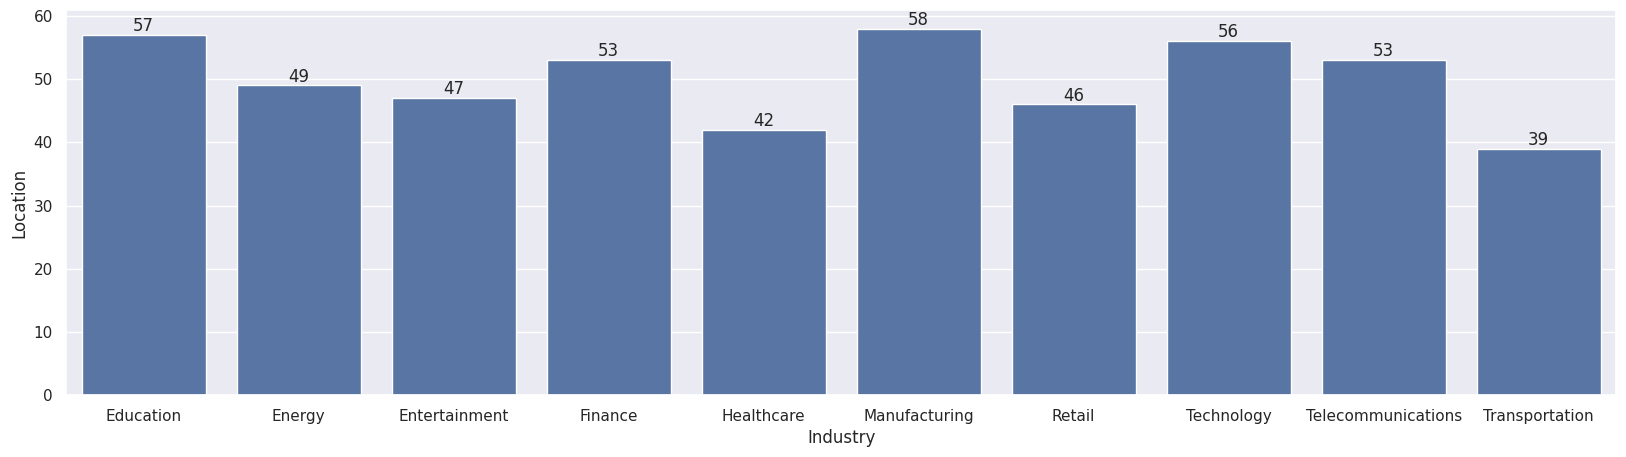

In [ ]:
result=df.groupby(['Industry'], as_index=False)['Location'].count()
ax=sns.barplot(x='Industry' , y='Location', data=result)
for bars in ax.containers:
  ax.bar_label(bars)

**The graph shows that height of the country involve with manufactuaring**

In [ ]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

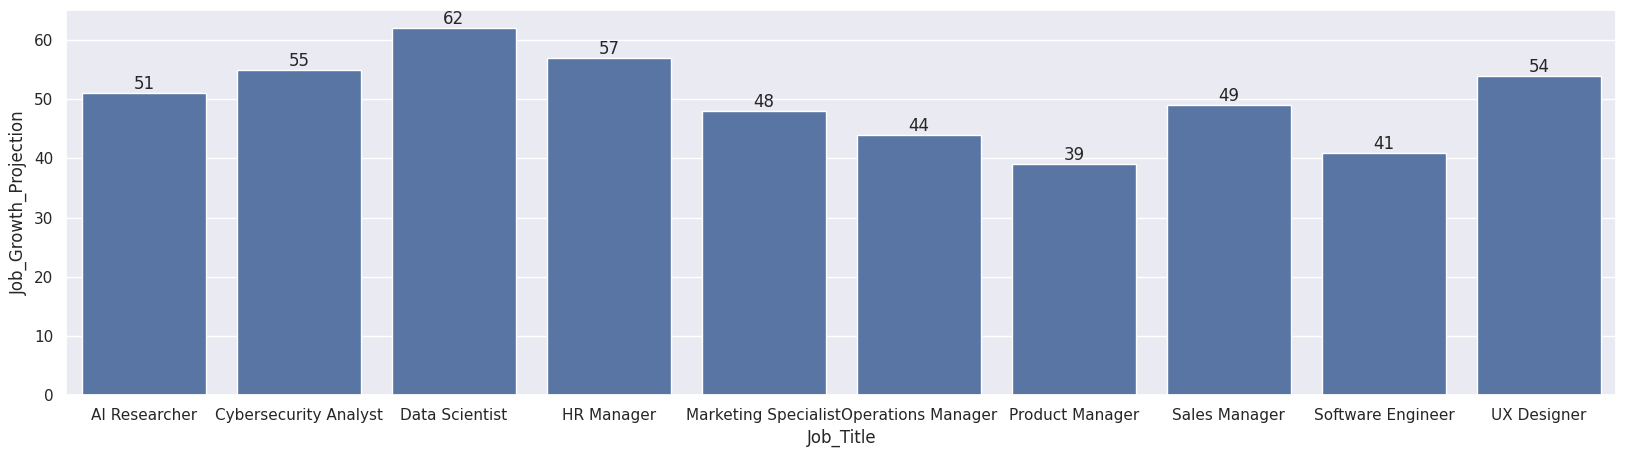

In [ ]:
result=df.groupby(['Job_Title'], as_index=False)['Job_Growth_Projection'].count()
ax=sns.barplot(x='Job_Title' , y='Job_Growth_Projection', data=result)
for bars in ax.containers:
  ax.bar_label(bars)

**The graph shows that data scientist are most high on demand based job growth projection**

In [ ]:
df['Remote_Friendly'].value_counts()

,count
Remote_Friendly,
Yes,251
No,249


In [ ]:
df['Job_Title'].value_counts()

,count
Job_Title,
Data Scientist,62
HR Manager,57
Cybersecurity Analyst,55
UX Designer,54
AI Researcher,51
Sales Manager,49
Marketing Specialist,48
Operations Manager,44
Software Engineer,41


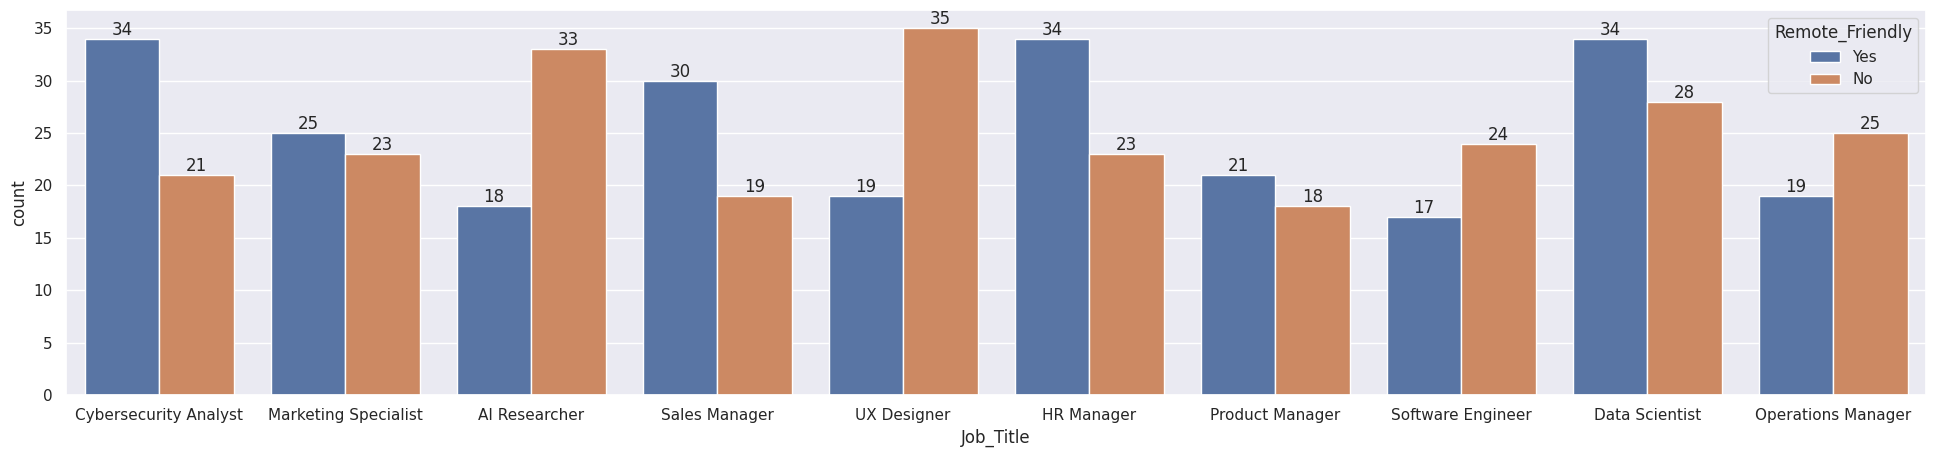

In [ ]:
ax=sns.countplot(x='Job_Title', hue='Remote_Friendly', data=df)
sns.set(rc={'figure.figsize':(20,4)})
for bars in ax.containers:
  ax.bar_label(bars)

**there are less number of remote friendly jobs are available for UX designer **

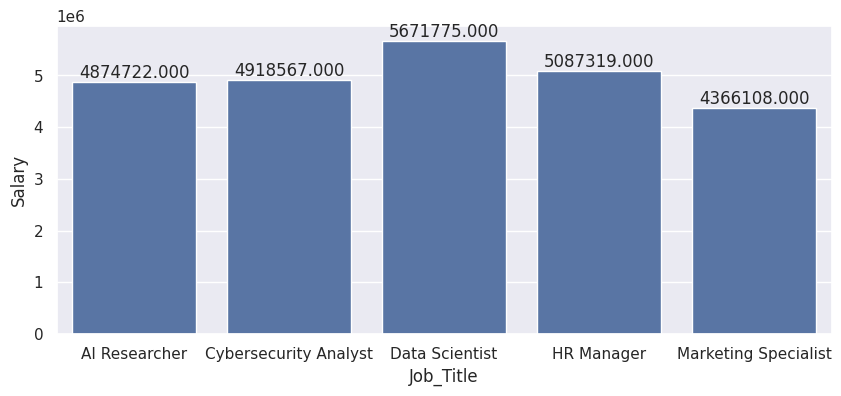

In [ ]:
result=df.groupby(['Job_Title'], as_index=False)['Salary'].sum().head(5)
ax=sns.barplot(x='Job_Title' , y='Salary', data=result)
sns.set(rc={'figure.figsize':(10,8)})
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.3f')